http://kyso.io/KyleOS/plotly-chart-editor?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com

# Example 1: Simple Scatter Plot

Ok, let's start with a relatively simple example to demonstrate the basic purpose of the extension.

First, let's pull in a all of the imports we'll need for this tutorial:

In [1]:
import plotly
import plotly.plotly as py
# plotly.tools.set_credentials_file(username='YYYYYYYYY', api_key='XXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.io as pio
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

import plotly.graph_objs as go
import pandas as pd

In [16]:
from IPython.display import Image

# Because I'm posting on Kyso (online, that is), I initiate offline plotting so all of the generated plots are viewable on our frontend.

-plotly.graph_objs contains the functions that will generate graph objects for us

-plotly.pio will allow us to read and write JSON data to plotly files

Let's create and display a basic figure:

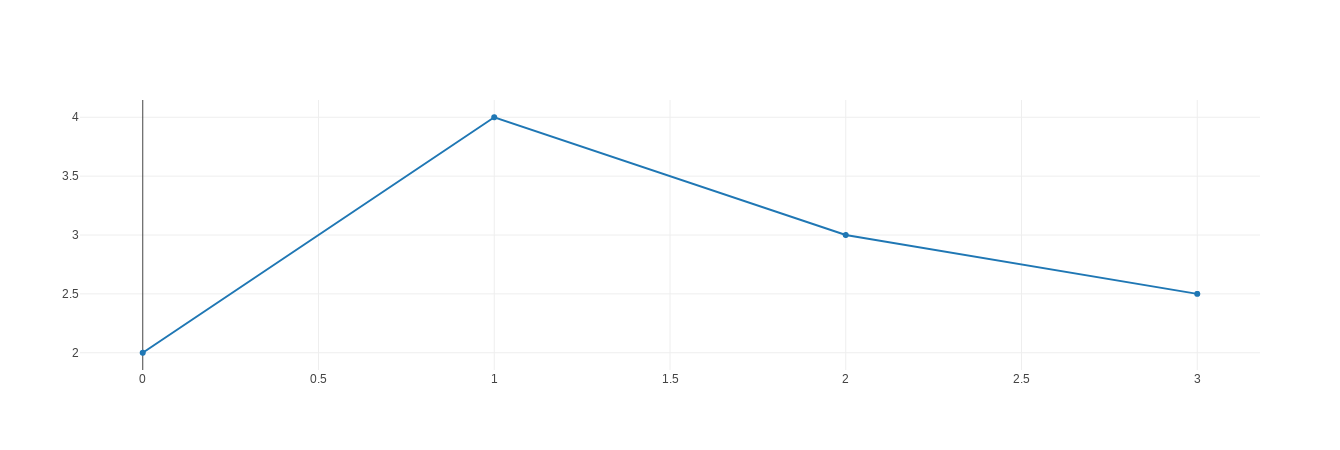

In [3]:
fig = go.FigureWidget()
fig.add_scatter(y=[2, 4, 3, 2.5])
iplot(fig)

## Perfect, we have a line plot that we will now customize using the editor. We first write the figure to JSON:

In [4]:
pio.write_json(fig, '/home/smcdnyc/Documents/GitHub/pydevpublic/Jupyter Labs beta plotly online sample/scatter.plotly')

This will create a .plotly file, which will appear in Jupyterlab's file browser on left-hand side. Right-click on the scatter.plotly from the file browser and open with "Plotly Editor".pio.write_json(fig, '/home/smcdnyc/Documents/GitHub/personalpydev/Jupyter Labs beta notebook projects/scatter.plotly')

We make some changes to the figure, then use the file menu to save as scatter-styled.plotly.

We import the new scatter-styled.plotly file back into plotly.py and display it inline:

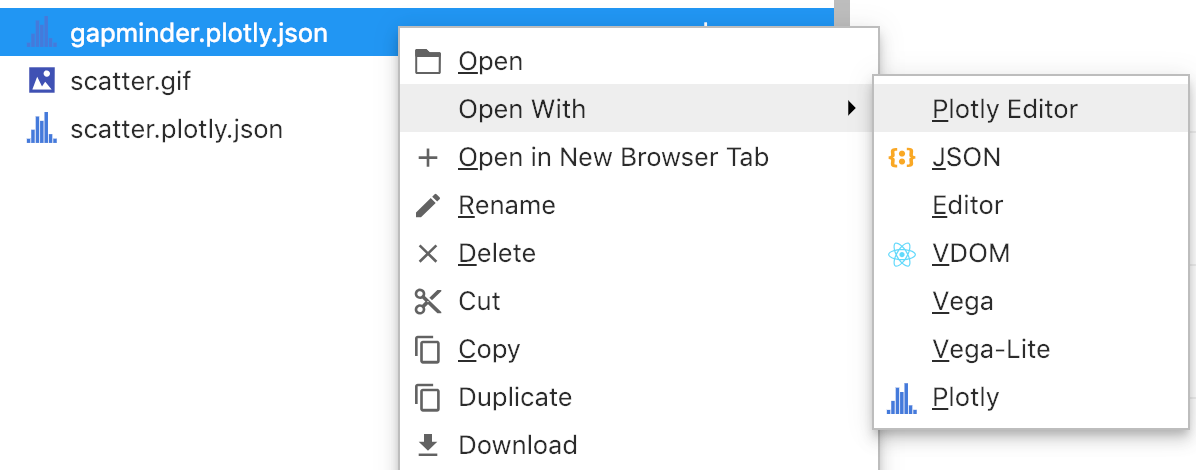

In [18]:
Image(url='https://raw.githubusercontent.com/smcdonald10nyc/pydevpublic/master/Jupyter%20Labs%20beta%20plotly%20online%20sample/plotly-editor.png', format='png', embed= True, width = 600)

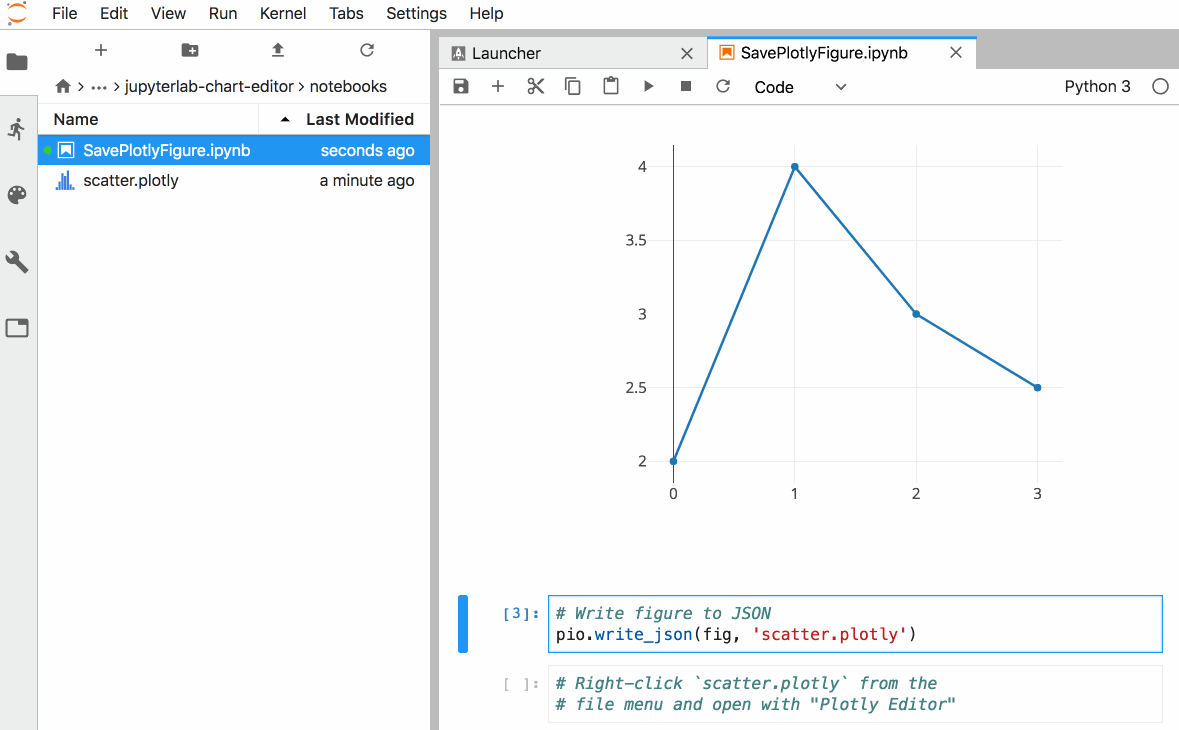

In [20]:
Image(url='https://raw.githubusercontent.com/smcdonald10nyc/pydevpublic/master/Jupyter%20Labs%20beta%20plotly%20online%20sample/scatter.gif', format='gif', embed= True, width = 800)

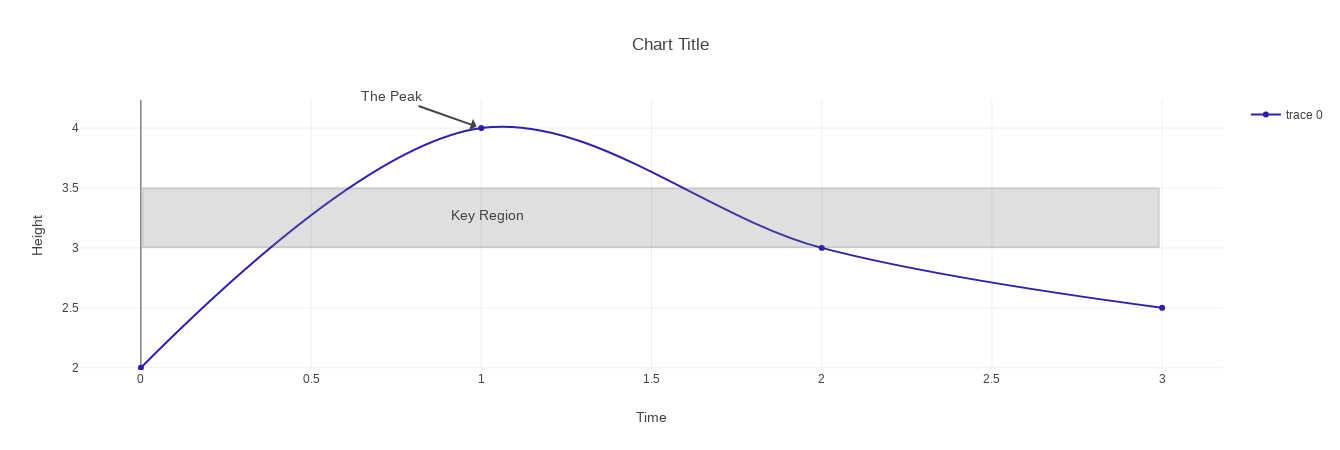

In [7]:
fig_styled = pio.read_json('/home/smcdnyc/Documents/GitHub/pydevpublic/Jupyter Labs beta plotly online sample/scatter_styled.plotly', output_type='FigureWidget')
iplot(fig_styled)

And there you have it! We've just customized a simple scatter figure without having to write any code!

## Example 2: Gapminder Bubble Plot

Let's read in some gapminder data and filter for a single year for the purpose of this example:

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv')
df_1982 = data[data['year'] == 1982]
df_1982 = df_1982.sort_values(['continent', 'country'])
df_1982.head()

country  year         pop continent  lifeExp    gdpPercap
30        Algeria  1982  20033753.0    Africa   61.368  5745.160213
42         Angola  1982   7016384.0    Africa   39.942  2756.953672
126         Benin  1982   3641603.0    Africa   50.904  1277.897616
162      Botswana  1982    970347.0    Africa   61.484  4551.142150
198  Burkina Faso  1982   6634596.0    Africa   48.122   807.198586

The gapminder dataset consists of various economic indicators of countries around the world, such as life expectancy and GDP per capita.

Let's first create an empty plotly figure:

In [9]:
fig = go.FigureWidget()
fig

FigureWidget({
    'data': [], 'layout': {}
})

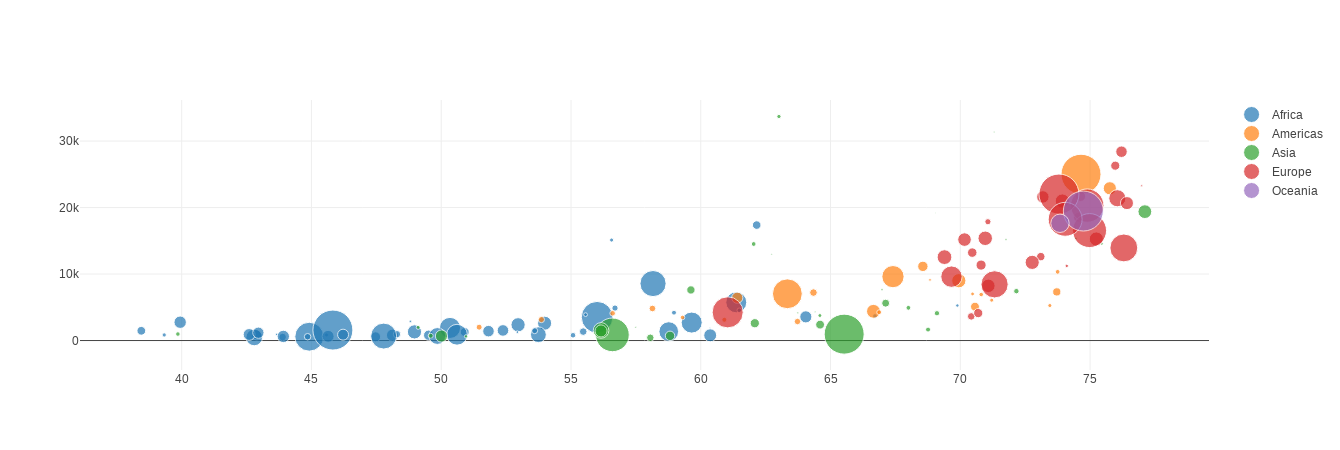

In [10]:
for continent, continent_df in df_1982.groupby('continent'):
    fig.add_scatter(x=continent_df.lifeExp,
                   y=continent_df.gdpPercap,
                   marker={'size': continent_df['pop'].tolist(), 'sizemode': 'area', 'sizeref':2.*max(continent_df['pop'].tolist())/(40.**2)},
                   mode='markers',
                   text=continent_df.country,
                   name=continent)
iplot(fig)

Ok, now let's add some data to our plotly figure. After executing the following cell, run

"fig.data"

in the next cell to see what our plot's underlying data structure is like now.

This is a pretty cool graph. We've grouped countries by their respective continents, and plotted their GDP per capita (y-axis) against life expectancy (x-axis), with the data points sized by their respective populations. Clearly, there is a positive correlation between the two indicators, but we won't dive into that just now.

Now we're going to use our chart editor to edit the figure's layout. Let's again write our figure to JSON.

In [11]:
pio.write_json(fig,'/home/smcdnyc/Documents/GitHub/pydevpublic/Jupyter Labs beta plotly online sample/gapminder.plotly')

As we did above, we can now customize the layout of our plot, except this time we'll make some more advanced edit operations.

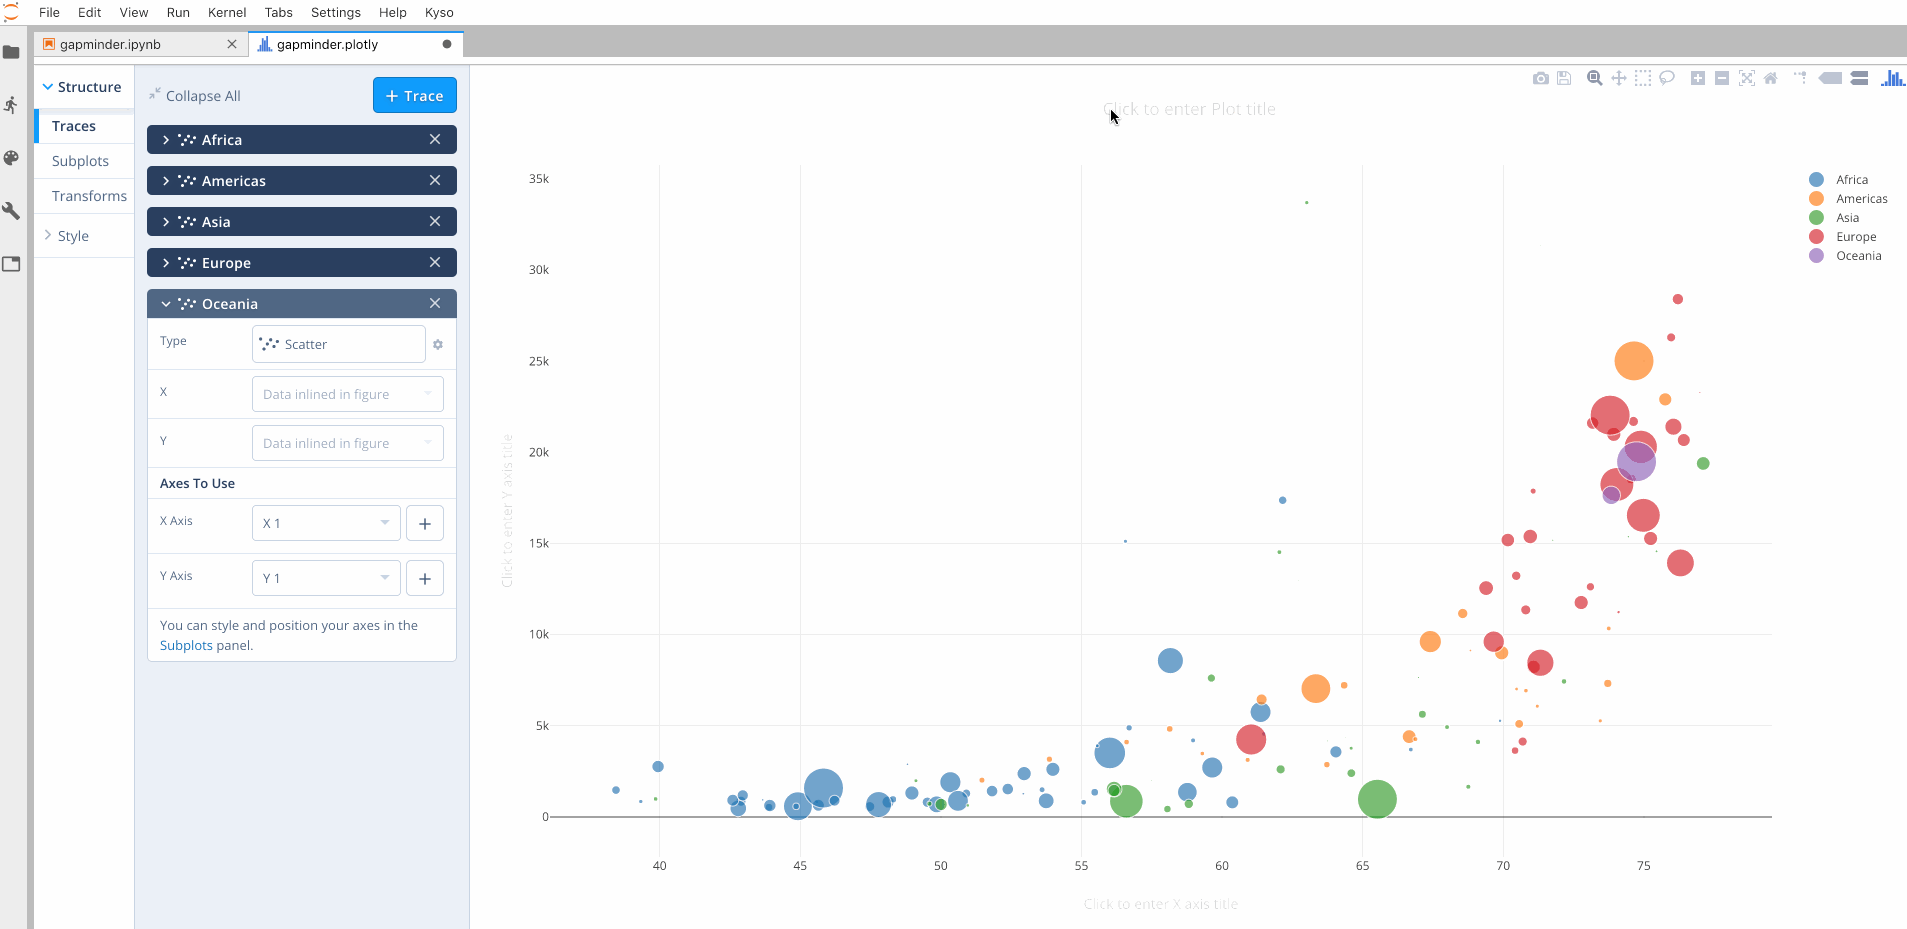

In [21]:
Image(url='https://raw.githubusercontent.com/smcdonald10nyc/pydevpublic/master/Jupyter%20Labs%20beta%20plotly%20online%20sample/gapminder.gif', format='gif', embed= True, width = 1000)

Some of these edits are made directly on the figure itself, such as the title and axis labels.

And then we make some data-related adjustments. We change the scale of the y-axis to a log-scale to get a clearer view of the dispersion between countries. We also make some other configurations to the plot, such as the colorscale, background color, the opacity of the traces, as well as the grid lines.

You can see that the final result is not unlike the popular ggplot style. We have also adjusted the custom dimensions of the plot, as seen above.

We can make some simple annotations of data points for static representation if you are exporting to a png or pdf file. You can download the plot directly to png. And we have saved the file under a new name.

And now we display our newly-styled plot in the notebook:

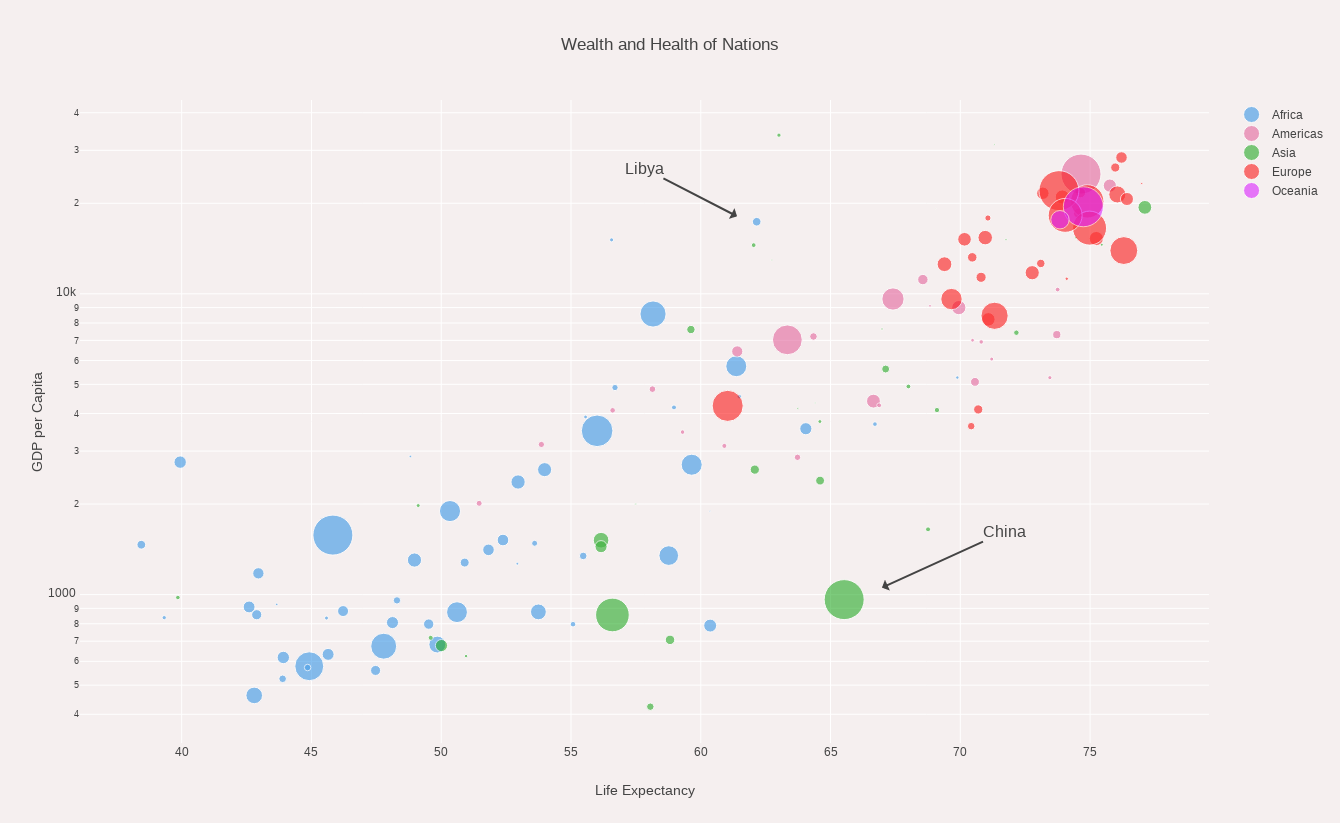

In [13]:
fig_styled = pio.read_json('/home/smcdnyc/Documents/GitHub/pydevpublic/Jupyter Labs beta plotly online sample/gapminder-styled.plotly', output_type='FigureWidget')
iplot(fig_styled)

You can also edit the json data directly in the notebook. For example, to edit the title:

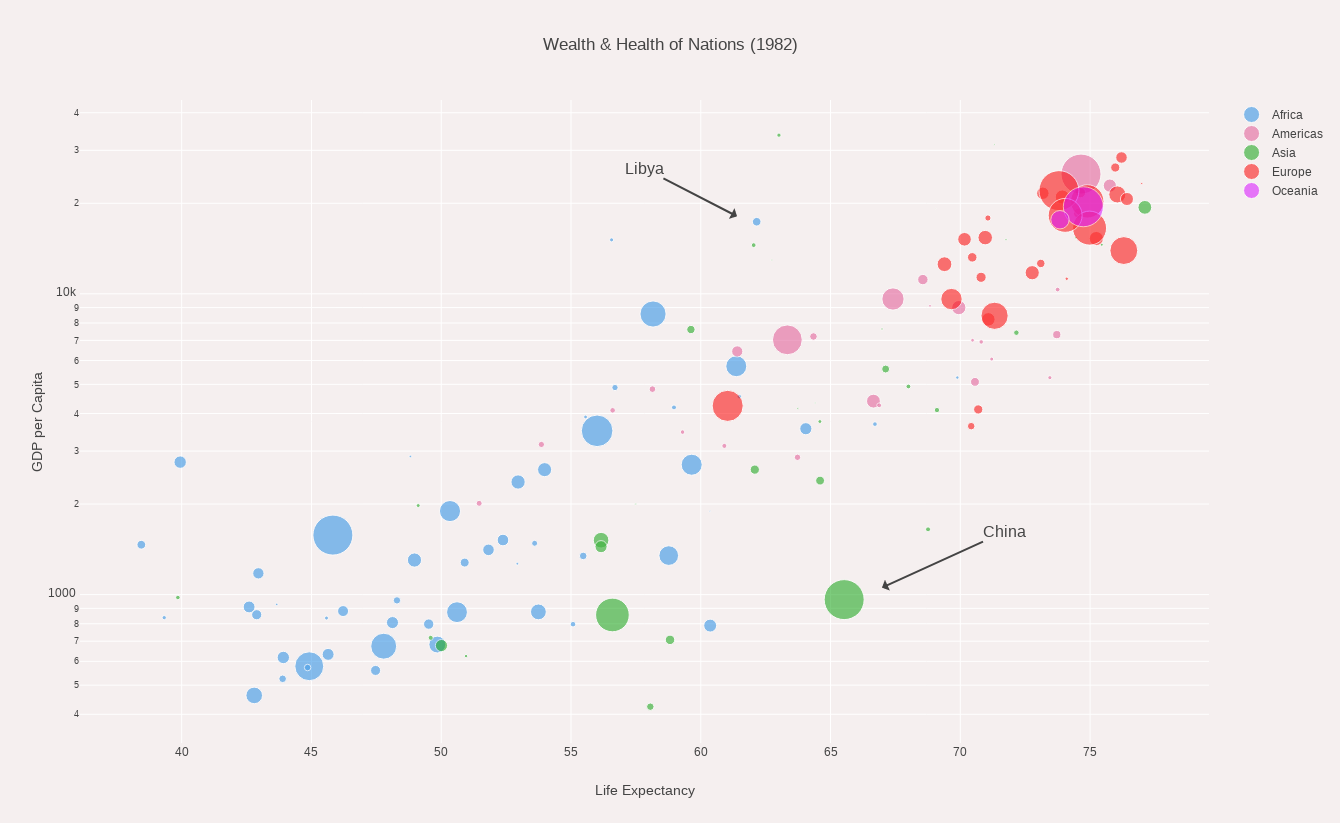

In [14]:
fig_styled.layout.title = 'Wealth & Health of Nations (1982)'
iplot(fig_styled)
# plot(fig_styled)
# plot_url = py.plot(fig_styled)

## Saving and Sharing your Charts

There are a multitude of different ways to share:

You can save as a standalone html file, which you can then open in the browser with a simple drag & drop.

In [15]:
%%capture
plot(fig_styled, filename='/home/smcdnyc/Documents/GitHub/pydevpublic/Jupyter Labs beta plotly online sample/gapminder-styled.html', auto_open=False)

This version of the file is self-contained, so you can just send it by email to friends or colleagues.

As we saw above, when downloading the plot as a png from the editor itself, the editor has static image export support. You can save as a PDF image to insert in an academic paper or to embed in a blog. This is cool because the PDF is saved in a high quality vector format.

In [16]:
pio.write_image(fig_styled, '/home/smcdnyc/Documents/GitHub/pydevpublic/Jupyter Labs beta plotly online sample/gapminder-styled.pdf')

Note that this property takes advantage of the orca project. If you don't have this currently installed, you can install it by running the following:

1
sudo conda install -c plotly plotly-orca
See the orca README (https://github.com/plotly/orca) for more info.

That's it for now! Please note that this blog only looked at a very small sample of the kinds of edits you can make with the chart editor. This new extension is really awesome for styling if, for example, you want to build a high-quality presentation or want to make complicated edits to existing plots you have generated, without having to have a live python kernel involved.

The maintainers over at plotly are continuing to improve upon the existing features of the extension. Some interesting ideas are:

Extracting the style of a plot into a template and be able to apply that style simply to other charts.
Reverting the newly-generated charts back to python code for further configuration. The current stop-gap solution to this is to print out the JSON representation of the figure (print(figure-name)) and copy & paste that into another figure.
At the moment the extension acts like a figure editor rather than figure builder - that is, editing existing figures from their JSON representation. It seems that the team are looking at a pandas DataFrame editor workflow, whereby the user would be able to build a chart from scratch based on the DataFrame.
Pretty exciting stuff!! I will be writing another post in the future once some of these new functionalities have been added.

Keep an eye on the component here for issues and updates! Bye for now!

https://github.com/plotly/jupyterlab-chart-editor